In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jcastillo/anaconda/envs/Python36/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
analyzer = SentimentIntensityAnalyzer()

def getCompound(sentence):
    return (analyzer.polarity_scores(sentence)['compound'])

# Survey Data

In [3]:
cat Surveys.csv | head -n 5

In [4]:
sData = pd.read_csv('Surveys.csv', keep_default_na=False, parse_dates=[2])
sData.columns = ['user_Num', 'survey_ID', 'date_user_responded', 'user_text_entry']
sData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
user_Num               147 non-null int64
survey_ID              147 non-null object
date_user_responded    147 non-null datetime64[ns]
user_text_entry        147 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.7+ KB


In [5]:
sData = sData.set_index('user_Num')
sData.head()

,survey_ID,date_user_responded,user_text_entry
user_Num,,,
19984772,ccsesslog,2017-03-21,saved cancellation
15323937,memsite,2017-03-21,2610878458\t User Call\t 09/27/2013\t Enrollme...
15323937,memsite,2017-03-21,Dialer Completed WelcomeCall
15323937,memsite,2017-03-21,Dialer Completed WelcomeCall
15323937,memsite,2017-03-21,Client request Direct Link be resent.


In [6]:
#sData['date_user_responded'] = sData['date_user_responded'].astype('datetime64[ns]')
#sData.info()

In [7]:
sData['compound'] = sData.user_text_entry.apply(getCompound)
sData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 19984772 to 2005476
Data columns (total 4 columns):
survey_ID              147 non-null object
date_user_responded    147 non-null datetime64[ns]
user_text_entry        147 non-null object
compound               147 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.7+ KB


In [9]:
sData.head()

,survey_ID,date_user_responded,user_text_entry,compound
user_Num,,,,
19984772,ccsesslog,2017-03-21,saved cancellation,0.4215
15323937,memsite,2017-03-21,2610878458\t User Call\t 09/27/2013\t Enrollme...,-0.1280
15323937,memsite,2017-03-21,Dialer Completed WelcomeCall,0.0000
15323937,memsite,2017-03-21,Dialer Completed WelcomeCall,0.0000
15323937,memsite,2017-03-21,Client request Direct Link be resent.,-0.1779


In [10]:
survey_Map = {"3":0, "actionflowsurvey":1, "advisor_boeingxrx":2, "advisor_nps":3, "advisor_nps_boeing":4,
             "ccsesslog":5, "csu":6, "fmrmacc":7, "incomeplan_nps":8, "iramacc":9, "jpmmacc":10,
             "memsite":11, "memsite_boeing":12, "socialsecurity_nps":13, "valuemetrics_nps":14, "vgmacc":15}

In [11]:
sData['survey_Num'] = sData.survey_ID.apply(survey_Map.get).astype(int)
sData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 19984772 to 2005476
Data columns (total 5 columns):
survey_ID              147 non-null object
date_user_responded    147 non-null datetime64[ns]
user_text_entry        147 non-null object
compound               147 non-null float64
survey_Num             147 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 6.9+ KB


In [15]:
sData.head()

,survey_ID,date_user_responded,user_text_entry,compound,survey_Num
user_Num,,,,,
19984772,ccsesslog,2017-03-21,saved cancellation,0.4215,5
15323937,memsite,2017-03-21,2610878458\t User Call\t 09/27/2013\t Enrollme...,-0.1280,11
15323937,memsite,2017-03-21,Dialer Completed WelcomeCall,0.0000,11
15323937,memsite,2017-03-21,Dialer Completed WelcomeCall,0.0000,11
15323937,memsite,2017-03-21,Client request Direct Link be resent.,-0.1779,11


# Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a510e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a49e3c8>]], dtype=object)

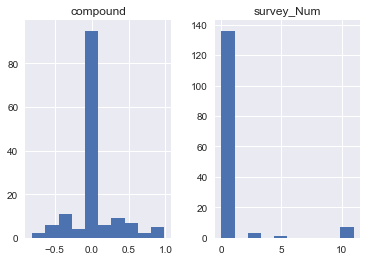

In [16]:
sData.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a63d668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a872e48>]], dtype=object)

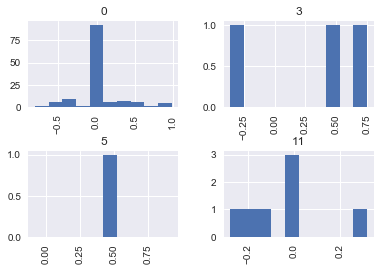

In [17]:
sData['compound'].hist(by=sData['survey_Num'])

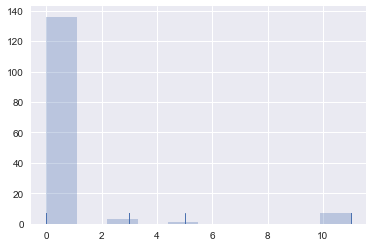

In [18]:
plt.hist(sData.survey_Num, alpha=.3)
sns.rugplot(sData.survey_Num);

# Time series

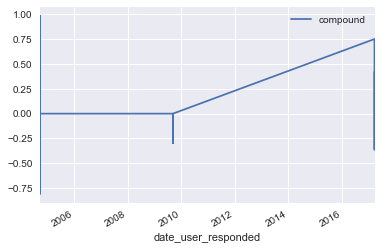

In [19]:
sData.plot(x='date_user_responded', y='compound')

# Scatter plot

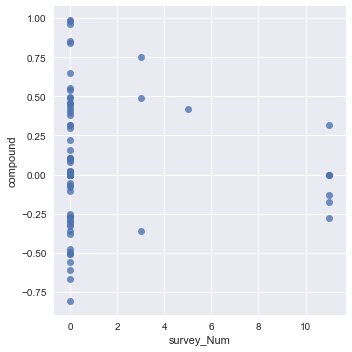

In [20]:
sns.lmplot('survey_Num', 'compound', data=sData, fit_reg=False)

# Density Plots

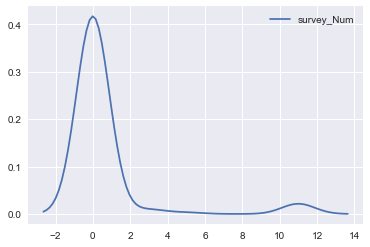

In [21]:
sns.kdeplot(sData.survey_Num)

AttributeError: 'function' object has no attribute 'astype'

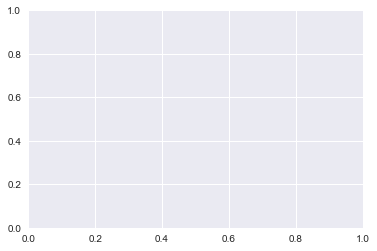

In [22]:
sns.kdeplot(sData.survey_Num, sData.compound)

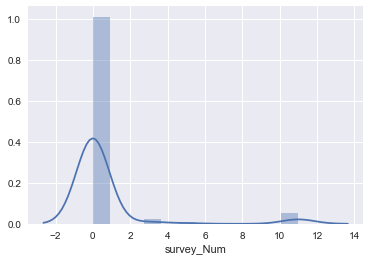

In [23]:
sns.distplot(sData.survey_Num)

# Box plot

TypeError: unsupported operand type(s) for +: 'method' and 'int'

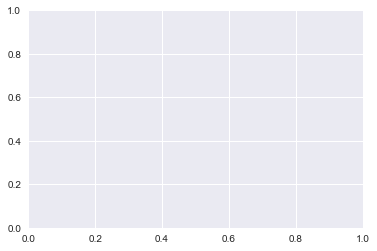

In [24]:
sns.boxplot([sData.compound, sData.survey_Num])

In [25]:
sns.heatmap([sData.survey_Num, sData.compound], annot=True, fmt="d")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''